In [52]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from pycaret import regression
from sklearn.model_selection import cross_val_score

In [53]:
df=pd.read_csv('/kaggle/input/malicious-urls-dataset/malicious_phish.csv',nrows=1000)


In [54]:
df.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [55]:
df.tail()

,url,type
995,youtube.com/watch?v=EcGsM-PNQHQ,benign
996,bloomberg.com/news/2011-08-28/dust-bowl-in-tex...,benign
997,http://www.slavia.sk/home,defacement
998,innerearbrigade.com/,benign
999,brokenbells.com/,benign


In [56]:
df.shape

(1000, 2)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   url     1000 non-null   object
 1   type    1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [58]:
df.dtypes

url     object
type    object
dtype: object

In [59]:
from sklearn.preprocessing import LabelEncoder

In [60]:
cat_cols=df.select_dtypes(include=['object']).columns.tolist()
cat_cols

['url', 'type']

In [61]:
le=LabelEncoder()
encoded_data=le.fit_transform(df['type'])

In [62]:
print(encoded_data)

[3 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0 3 0 0 0 0 0 0 3 0 0 0 0 0 0 1 0
 0 2 1 3 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 3 0
 0 0 0 0 0 0 1 0 0 0 0 0 1 3 0 0 1 0 0 0 3 0 1 0 0 1 0 1 0 0 1 3 3 0 0 0 0
 1 0 0 0 2 0 1 0 0 0 0 0 0 1 0 3 0 0 0 0 0 1 0 0 0 0 1 0 3 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 2 0 3 0 0 0 1 1 0 0 1 3 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 3 0 1 0 0 0 1 0 0 0 0 3 1 0 0 0 0 0 0 0 0 0 0 0 0 2 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 3 0 3 0 0 0 1 0 2 0 0 2 0 0 3 0 0 0 0 3 0 1 0 1 1 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0
 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1 0 1 0
 0 0 0 1 1 0 2 0 0 0 3 0 0 0 0 0 3 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1
 0 2 0 0 0 0 0 0 0 3 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 3 0 1
 1 3 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 3 0 0 0 0 0 0 0 0 0 2 0 0 0
 0 1 0 0 0 1 2 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 3 3 3 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 

In [63]:
df

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
...,...,...
995,youtube.com/watch?v=EcGsM-PNQHQ,benign
996,bloomberg.com/news/2011-08-28/dust-bowl-in-tex...,benign
997,http://www.slavia.sk/home,defacement
998,innerearbrigade.com/,benign


In [64]:
df['type']=encoded_data

In [65]:
df

,url,type
0,br-icloud.com.br,3
1,mp3raid.com/music/krizz_kaliko.html,0
2,bopsecrets.org/rexroth/cr/1.htm,0
3,http://www.garage-pirenne.be/index.php?option=...,1
4,http://adventure-nicaragua.net/index.php?optio...,1
...,...,...
995,youtube.com/watch?v=EcGsM-PNQHQ,0
996,bloomberg.com/news/2011-08-28/dust-bowl-in-tex...,0
997,http://www.slavia.sk/home,1
998,innerearbrigade.com/,0


In [66]:
df.isnull().any()

url     False
type    False
dtype: bool

In [67]:
df.dtypes

url     object
type     int64
dtype: object

In [68]:
class_counts=df['type'].value_counts()

print('Class distribution:')
print(class_counts)

Class distribution:
type
0    734
1    181
3     54
2     31
Name: count, dtype: int64


<Axes: xlabel='type', ylabel='count'>

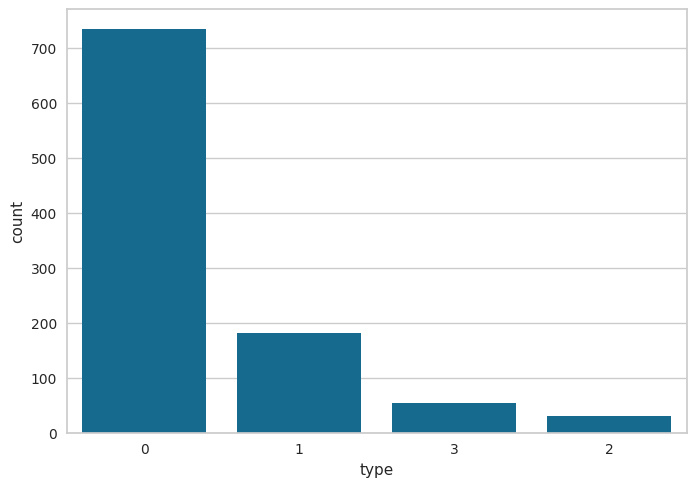

In [69]:
sns.countplot(x='type',data=df,order=df['type'].value_counts().index)

In [70]:
from transformers import BertModel,BertTokenizer
import torch

model=BertModel.from_pretrained('bert-base-uncased',output_hidden_states=True)
tokenizer=BertTokenizer.from_pretrained('bert-base-uncased')

In [71]:
def extract_features(text):
    input_ids=torch.tensor([tokenizer.encode(text,add_special_tokens=True)])
    with torch.no_grad():
        outputs=model(input_ids)
        hidden_states=outputs[2]
    token_vecs=[]
    for layer in range(-4,0):
        token_vecs.append(hidden_states[layer][0])
    features=[]
    for token in token_vecs:
        features.append(torch.mean(token,dim=0))
    return torch.stack(features)    

In [72]:
features=[]
for i in range(len(df)):
    features.append(extract_features(df.iloc[i]['url']))
features=torch.cat(features).numpy()    

In [73]:
features

array([[ 0.20866221, -0.3019188 ,  0.08405154, ..., -0.6917094 ,
         0.326475  ,  0.46026862],
       [ 0.16422953, -0.33757487, -0.01675365, ..., -0.5035049 ,
         0.23100558,  0.60487694],
       [ 0.18217373, -0.25289023, -0.06339657, ..., -0.27169907,
         0.14275028,  0.47711936],
       ...,
       [ 0.56814855, -0.46876657, -0.29942217, ..., -0.46464208,
        -0.07836789, -0.15953965],
       [ 0.6326019 , -0.4313939 , -0.37300438, ..., -0.23353879,
        -0.17966646, -0.16202736],
       [ 0.62288475, -0.07720767, -0.41445485, ...,  0.06254065,
        -0.20890906, -0.17801058]], dtype=float32)

In [74]:
types=df['type'].values
types

array([3, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 3,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 3, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 3,
       0, 0, 1, 0, 0, 0, 3, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 3, 3, 0, 0, 0,
       0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 3, 0, 0, 0, 1, 1, 0, 0, 1, 3, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 1, 0, 2, 0,
       0, 2, 0, 0, 3, 0, 0, 0, 0, 3, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,

In [75]:
print(features.shape)
print(types.shape)

(4000, 768)
(1000,)


In [76]:
features_reshaped=features.reshape((1000,-1))
dataset=np.hstack((features_reshaped,types.reshape(-1,1)))

In [77]:
features_reshaped.shape

(1000, 3072)

In [78]:
dataset

array([[ 0.20866221, -0.3019188 ,  0.08405154, ...,  0.09338009,
         0.28850073,  3.        ],
       [ 0.1221412 , -0.1404355 ,  0.56440711, ..., -0.1879735 ,
        -0.10648327,  0.        ],
       [ 0.38706818, -0.01241244,  0.49862349, ..., -0.15056317,
         0.12027889,  0.        ],
       ...,
       [ 0.31936833, -0.52491599,  0.29337424, ..., -0.66254377,
         0.10896014,  1.        ],
       [ 0.6674509 , -0.72515827,  0.37217614, ..., -0.12280736,
         0.22292736,  0.        ],
       [ 0.43090603, -0.4179534 ,  0.04056732, ..., -0.20890906,
        -0.17801058,  0.        ]])

In [79]:
dataset.shape

(1000, 3073)

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
train_data,test_data=train_test_split(dataset,test_size=0.2,random_state=42)

In [82]:
X_train,y_train=train_data[:,:-1],train_data[:,-1]
X_test,y_test=test_data[:,:-1],test_data[:,-1]

In [83]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
X_train_res,y_train_res=sm.fit_resample(X_train,y_train)

y_train_s=pd.Series(y_train)
y_train_res=pd.Series(y_train_res)
print('class distribution before resampling:',y_train_s.value_counts())
print('class distribution after resampling:',y_train_res.value_counts())

class distribution before resampling: 0.0    593
1.0    138
3.0     45
2.0     24
Name: count, dtype: int64
class distribution after resampling: 0.0    593
1.0    593
3.0    593
2.0    593
Name: count, dtype: int64


In [84]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression()

In [85]:
score=clf.score(X_test,y_test)

In [86]:
print("acurracy:",score)

acurracy: 0.96


In [87]:
y_pred=clf.predict(X_test)

In [88]:
type(X_test)
X_test.shape

(200, 3072)

In [89]:
pred=extract_features("http://www.824555.com/app/member/SportOption.php?uid=guest&langx=gb").numpy()
pred=np.reshape(pred,(1,3072))
clf.predict(pred)

array([2.])

In [90]:
from sklearn.metrics import confusion_matrix,classification_report

In [91]:
cm=confusion_matrix(y_test,y_pred)
cr=classification_report(y_test,y_pred)

In [93]:
print("Confusion Matrix:\n",cm)

Confusion Matrix:
 [[140   0   0   1]
 [  1  41   1   0]
 [  1   1   4   1]
 [  1   1   0   7]]


In [94]:
print("Classification Report:\n",cr)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       141
         1.0       0.95      0.95      0.95        43
         2.0       0.80      0.57      0.67         7
         3.0       0.78      0.78      0.78         9

    accuracy                           0.96       200
   macro avg       0.88      0.82      0.85       200
weighted avg       0.96      0.96      0.96       200

